In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fruit_data_with_colors.txt", delimiter = '\t')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


<AxesSubplot:xlabel='height', ylabel='color_score'>

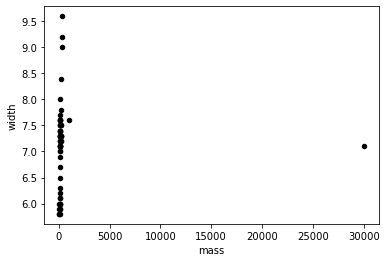

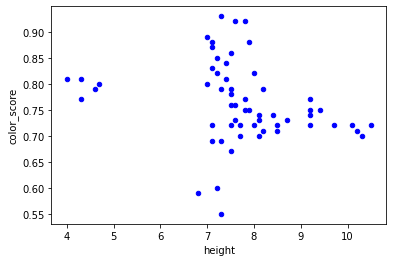

In [4]:
df.plot.scatter(x = 'mass', y = 'width', color = 'black')
df.plot.scatter(x = 'height', y = 'color_score', color = 'blue')

In [5]:
df = df.drop(columns = ['fruit_label','fruit_name','fruit_subtype'], axis = 1)

In [6]:
df.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [7]:
x = np.array(df)
random.shuffle(x)
k = 4    

In [8]:
centroids_index = np.random.randint(0, 58,( 4,))
centroids_index

array([48,  3, 52, 35])

In [9]:
x[centroids_index]

array([[176.  ,   7.4 ,   7.2 ,   0.6 ],
       [192.  ,   8.4 ,   7.3 ,   0.55],
       [154.  ,   7.  ,   7.1 ,   0.88],
       [192.  ,   8.4 ,   7.3 ,   0.55]])

In [10]:
ctds = x[centroids_index]

In [11]:
ctds

array([[176.  ,   7.4 ,   7.2 ,   0.6 ],
       [192.  ,   8.4 ,   7.3 ,   0.55],
       [154.  ,   7.  ,   7.1 ,   0.88],
       [192.  ,   8.4 ,   7.3 ,   0.55]])

In [12]:
x= np.delete(x,centroids_index, axis = 0)

In [13]:
clusters = [[], [], [], []]
clusters[0].append(ctds[0])
clusters[1].append(ctds[1])
clusters[2].append(ctds[2])
clusters[3].append(ctds[3])

In [14]:
clusters

[[array([176. ,   7.4,   7.2,   0.6])],
 [array([192.  ,   8.4 ,   7.3 ,   0.55])],
 [array([154.  ,   7.  ,   7.1 ,   0.88])],
 [array([192.  ,   8.4 ,   7.3 ,   0.55])]]

In [15]:
def euclidean_distance(centroid, x):
    difference = np.array(x) - np.array(centroid)
    sqrd_diff = np.square(difference)
    sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
    distance = np.sqrt(sum_sqrd_diff)
    
    return distance

In [16]:
len(clusters[0])

1

In [17]:
len(clusters[1])

1

In [18]:
len(clusters[2])

1

In [19]:
len(clusters[3])

1

In [20]:
c1 = euclidean_distance(ctds[0], x)
c2 = euclidean_distance(ctds[1], x)
c3 = euclidean_distance(ctds[2], x)
c4 = euclidean_distance(ctds[3], x)

In [21]:
c1

array([ 16.0316094 ,  16.0316094 ,   0.        ,  92.0475752 ,
        16.0316094 ,  96.05726886,   4.06449259,  92.0475752 ,
        92.0475752 ,  16.0316094 ,   4.04381008,  96.05573434,
         4.04381008,  90.0429342 ,   0.        ,   4.04381008,
        92.0475752 ,  16.0316094 ,  12.01124473, 824.00008186,
        12.01124473,  90.0429342 ,  10.01842802,  92.0475752 ,
       180.02017248, 100.06419989,  22.00564473,  90.0429342 ,
        14.00223196,  18.00600178, 100.06419989,  14.00260333,
       100.06419989,   4.04381008,   4.01548254,  10.01842802,
       186.0238146 ,  18.00600178,  26.01158396,  16.0316094 ,
        14.00223196,   4.1323238 , 166.02235542,  36.00129025,
        26.01158396,  92.0475752 , 166.02235542,  14.00223196,
        34.00621267,  24.00121039,   3.52624446, 824.00008186,
        34.00621267,   2.1336354 ,  34.00621267])

In [22]:
len(x)

55

In [23]:
len(c1)

55

In [24]:
for i in x:
    id = np.argmin(euclidean_distance(i, ctds))
    clusters[id].append(i)

In [25]:
clusters

[[array([176. ,   7.4,   7.2,   0.6]),
  array([176. ,   7.4,   7.2,   0.6]),
  array([180.  ,   8.  ,   6.8 ,   0.59]),
  array([172.  ,   7.1 ,   7.6 ,   0.92]),
  array([172.  ,   7.1 ,   7.6 ,   0.92]),
  array([176. ,   7.4,   7.2,   0.6]),
  array([172.  ,   7.1 ,   7.6 ,   0.92]),
  array([166.  ,   6.9 ,   7.3 ,   0.93]),
  array([172.  ,   7.1 ,   7.6 ,   0.92]),
  array([172.  ,   7.4 ,   7.  ,   0.89]),
  array([166.  ,   6.9 ,   7.3 ,   0.93]),
  array([180.  ,   7.6 ,   8.2 ,   0.79]),
  array([174.  ,   7.3 ,  10.1 ,   0.72]),
  array([178.  ,   7.1 ,   7.8 ,   0.92])],
 [array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([192.  ,   8.4 ,   7.3 ,   0.55]),
  array([1.0e+03, 7.6e+00, 7.5e+00, 6.7e-01]),
  array([356.  ,   9.2 ,   9.2 ,   0.75]),
  array([362.  ,   9.6 ,   9.2 ,   0.74]),
  array([192.  ,  

In [26]:
ctds[0] = np.mean(clusters[0], axis = 0)
ctds[1] = np.mean(clusters[1], axis = 0)
ctds[2] = np.mean(clusters[2], axis = 0)
ctds[3] = np.mean(clusters[3], axis = 0)

In [27]:
for i in range(5):
    prev_clusters = clusters
    
    #prev_centroids = [ctds[0], ctds[1], ctds[2], ctds[3]]
    c1 = euclidean_distance(ctds[0], x)
    c2 = euclidean_distance(ctds[1], x)
    c3 = euclidean_distance(ctds[2], x)
    c4 = euclidean_distance(ctds[3], x)
    
    clusters = [[], [], [], []]
    clusters[0].append(ctds[0])
    clusters[1].append(ctds[1])
    clusters[2].append(ctds[2])
    clusters[3].append(ctds[3])
    
    for j in x:
        id = np.argmin(euclidean_distance(j, ctds))
        clusters[id].append(j)
    
    ctds[0] = np.mean(clusters[0], axis = 0)
    ctds[1] = np.mean(clusters[1], axis = 0)
    ctds[2] = np.mean(clusters[2], axis = 0)
    ctds[3] = np.mean(clusters[3], axis = 0)
    
    #new_centroids = [ctds[0], ctds[1], ctds[2], ctds[3]]
    
    #if np.array_equiv( prev_centroids, new_centroids):
        #print("Centroids of newly formed clusters do not change.")
        #break
    print("Length of cluster 0 = ", len(clusters[0]))
    print("Length of cluster 1 = ", len(clusters[1]))
    print("Length of cluster 2 = ", len(clusters[2]))
    print("Length of cluster 3 = ", len(clusters[3]), '\n')
    
    #if np.array_equiv(prev_clusters, clusters):
       #print("Points remain in the same cluster.")
        #break
        
    
#clusters

Length of cluster 0 =  26
Length of cluster 1 =  7
Length of cluster 2 =  19
Length of cluster 3 =  7 

Length of cluster 0 =  28
Length of cluster 1 =  3
Length of cluster 2 =  15
Length of cluster 3 =  13 

Length of cluster 0 =  36
Length of cluster 1 =  3
Length of cluster 2 =  15
Length of cluster 3 =  5 

Length of cluster 0 =  36
Length of cluster 1 =  3
Length of cluster 2 =  15
Length of cluster 3 =  5 

Length of cluster 0 =  36
Length of cluster 1 =  3
Length of cluster 2 =  15
Length of cluster 3 =  5 



<AxesSubplot:xlabel='height', ylabel='color_score'>

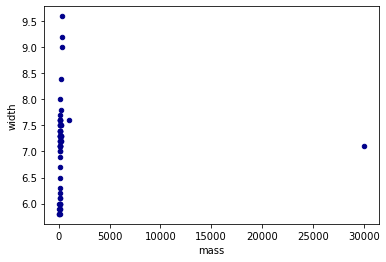

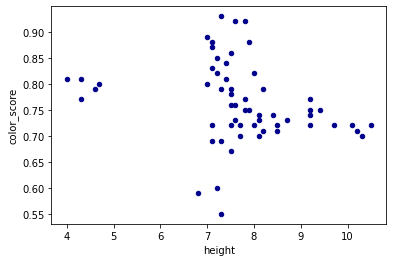

In [28]:
df.plot.scatter(x='mass',
...                       y='width',
...                       c='DarkBlue')
df.plot.scatter(x='height',
...                       y='color_score',
...                       c='DarkBlue')

In [29]:
df.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [30]:
clusters[0]

[array([167.77129756,   7.49142376,   7.51142959,   0.75714395]),
 array([192.  ,   8.4 ,   7.3 ,   0.55]),
 array([192.  ,   8.4 ,   7.3 ,   0.55]),
 array([176. ,   7.4,   7.2,   0.6]),
 array([192.  ,   8.4 ,   7.3 ,   0.55]),
 array([180.  ,   8.  ,   6.8 ,   0.59]),
 array([192.  ,   8.4 ,   7.3 ,   0.55]),
 array([172.  ,   7.1 ,   7.6 ,   0.92]),
 array([172.  ,   7.1 ,   7.6 ,   0.92]),
 array([176. ,   7.4,   7.2,   0.6]),
 array([172.  ,   7.1 ,   7.6 ,   0.92]),
 array([192.  ,   8.4 ,   7.3 ,   0.55]),
 array([164. ,   7.3,   7.7,   0.7]),
 array([164. ,   7.3,   7.7,   0.7]),
 array([166.  ,   6.9 ,   7.3 ,   0.93]),
 array([154.  ,   7.  ,   7.1 ,   0.88]),
 array([162.  ,   7.4 ,   7.2 ,   0.85]),
 array([158.  ,   7.1 ,   7.5 ,   0.79]),
 array([162.  ,   7.5 ,   7.1 ,   0.83]),
 array([172.  ,   7.1 ,   7.6 ,   0.92]),
 array([172.  ,   7.4 ,   7.  ,   0.89]),
 array([166.  ,   6.9 ,   7.3 ,   0.93]),
 array([158.  ,   7.1 ,   7.5 ,   0.79]),
 array([150.  ,   7.1 ,   

In [31]:
len(clusters[0])

36

In [32]:
len(clusters[1])

3

In [33]:
len(clusters[2])

15

In [34]:
len(clusters[3])

5

In [166]:
total = len(clusters[0]) + len(clusters[1]) + len(clusters[2]) + len(clusters[3])
total

59